In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def parse_coordinates(file_path):
    """
    Parse a CSV file with coordinates stored across separate columns into a 3x3 matrix or 3 lists.

    Parameters:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: DataFrame with parsed Coordinates as a list of lists.
    """
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path, skiprows=1, header=None)

    # Identify the coordinate columns (assuming they start from the third column)
    coordinate_columns = df.columns[2:]
    # df = df[coordinate_columns]

    # Group the coordinates into lists of 3 elements
    df['Parsed_Coordinates'] = df[coordinate_columns].apply(
        lambda row: [
            row.values[i:i + 3].tolist() for i in range(0, len(row.values), 3)
        ], axis=1
    )

    return df

# Example Usage
# Assuming the file is named "coordinates.csv"
df = parse_coordinates("md_simulation_output.csv")
df.head()


,0,1,2,3,4,5,6,7,8,9,10,Parsed_Coordinates
0,0,-524.046585,-0.214557,0.246631,0.861445,-0.008505,1.859837,-1.505949,0.086588,-2.223184,-1.149872,"[[-0.214557, 0.246631, 0.861445], [-0.008505, ..."
1,1,-526.101118,-0.179583,0.241520,0.706977,-0.050448,1.852316,-1.478950,0.034301,-2.212424,-1.117515,"[[-0.179583, 0.24152, 0.706977], [-0.050448, 1..."
2,2,-528.033828,-0.232920,0.222841,0.618370,-0.061790,1.860165,-1.382655,0.094175,-2.154844,-1.075111,"[[-0.23292, 0.222841, 0.61837], [-0.06179, 1.8..."
3,3,-532.288005,-0.298078,0.066172,0.392943,-0.041680,1.763934,-1.254146,0.165013,-2.050866,-1.050823,"[[-0.298078, 0.066172, 0.392943], [-0.04168, 1..."
4,4,-534.089631,-0.366015,0.191262,0.251418,0.095182,1.637781,-1.521629,0.144196,-1.854116,-0.937491,"[[-0.366015, 0.191262, 0.251418], [0.095182, 1..."


In [94]:
energies_coords = df[[1, 'Parsed_Coordinates']]
energies_coords.columns = ['Energies', 'Coordinates']

In [95]:
o_coords = []
h1_coords = []
h2_coords = []

for row_num in range(len(energies_coords)):
    this_oxygen_coords = energies_coords['Coordinates'][row_num][0]
    this_H1_coords = energies_coords['Coordinates'][row_num][1]
    this_H2_coords = energies_coords['Coordinates'][row_num][2]

    o_coords.append(this_oxygen_coords)
    h1_coords.append(this_H1_coords)
    h2_coords.append(this_H2_coords)

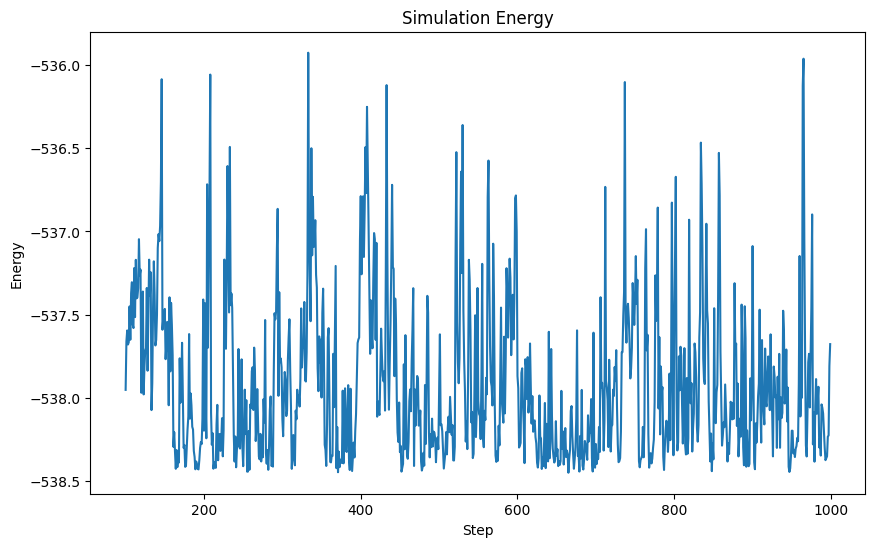

In [96]:
def plot_energies(df, start=100, end=1000):
    """
    Plot the Energies column from the DataFrame within a specified range.

    Parameters:
        df (pd.DataFrame): The input DataFrame with an 'Energies' column.
        start (int): The start index for the range.
        end (int): The end index for the range.

    Returns:
        None
    """
    # Extract the relevant range of Energies
    energies = df['Energies'][start:end]

    # Plot the Energies
    plt.figure(figsize=(10, 6))
    plt.plot(range(start, end), energies)
    plt.title('Simulation Energy')
    plt.xlabel('Step')
    plt.ylabel('Energy')
    plt.show()

# Example Usage
plot_energies(energies_coords)

In [97]:
def angle(atom1, atom2, atom3):

    v1 = atom1 - atom2
    v2 = atom3 - atom2

    dp = np.dot(v1, v2)
    m1 = np.linalg.norm(v1)
    m2 = np.linalg.norm(v1)

    cos_theta = np.clip(dp / (m1 * m2), -1, 1)
    return np.arccos(cos_theta)

def distance(atom1, atom2):
    return np.linalg.norm(atom1 - atom2)

In [113]:
angles = []
o_h1 = []
o_h2 = []
o_coords = np.array(o_coords)
h1_coords = np.array(h1_coords)
h2_coords = np.array(h2_coords)

for row_num in range(1000):
    atom1 = o_coords[row_num]
    atom2 = h1_coords[row_num]
    atom3 = h2_coords[row_num]

    angles.append(angle(atom1, atom2, atom3))
    this_o_h1 = distance(atom1, atom2)
    o_h1.append(this_o_h1)
    o_h2.append(distance(atom1, atom3))

angles

[np.float64(0.4550057539013625),
 np.float64(0.13069618740708663),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.36916591517592146),
 np.float64(0.4286833228167156),
 np.float64(0.5127407431642894),
 np.float64(0.4700252328141803),
 np.float64(0.619871259842355),
 np.float64(0.43757625284134877),
 np.float64(0.38751353373600134),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.27207162676086266),
 np.float64(0.0),
 np.float64(0.11119589248415768),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.2954547504342576),
 np.f

ValueError: x and y must have same first dimension, but have shapes (900,) and (0,)

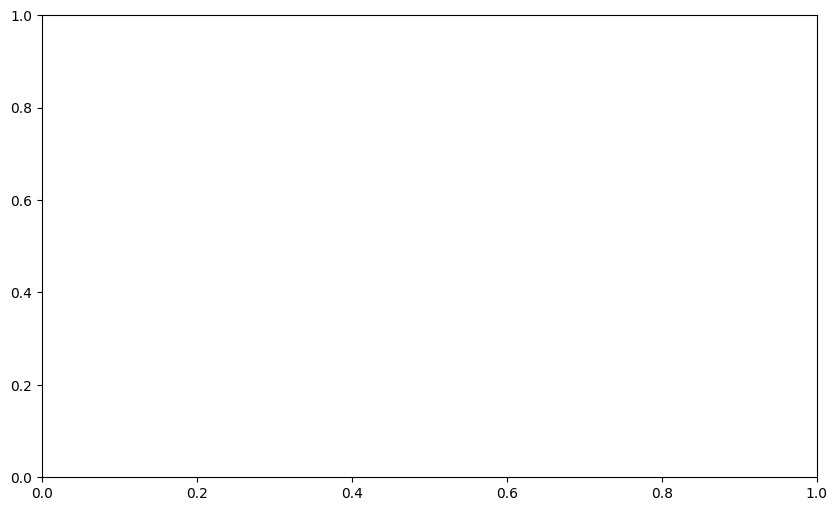

In [110]:
def plot_angles(angles, start=100, end=1000):
    """
    Plot the Angles column from the DataFrame within a specified range.

    Parameters:
        df (pd.DataFrame): The input DataFrame with an 'Energies' column.
        start (int): The start index for the range.
        end (int): The end index for the range.

    Returns:
        None
    """
    # Extract the relevant range of Energies
    angles = angles[start:end]
    angles = angles * 57.2958

    # Plot the Energies
    plt.figure(figsize=(10, 6))
    plt.plot(range(start, end), angles)
    plt.title('Simulation Angles')
    plt.xlabel('Step')
    plt.ylabel('Bond Angle')
    plt.show()

plot_angles(np.array(angles))

In [ ]:
def plot_bond_distance(bond_distances, start=100, end=1000):
    """
    Plot the Angles column from the DataFrame within a specified range.

    Parameters:
        df (pd.DataFrame): The input DataFrame with an 'Energies' column.
        start (int): The start index for the range.
        end (int): The end index for the range.

    Returns:
        None
    """
    # Extract the relevant range of Energies
    bond_distances = bond_distances[start:end]

    # Plot the Energies
    plt.figure(figsize=(10, 6))
    plt.plot(range(start, end), bond_distances)
    plt.title('Simulation Distances')
    plt.xlabel('Step')
    plt.ylabel('H-O Distance (Bohr)')
    plt.show()

In [100]:
o_h1

[np.float64(2.8721847740659023),
 np.float64(2.718384897539346),
 np.float64(2.5911805048087637),
 np.float64(2.379293575196008),
 np.float64(2.3342698118210325),
 np.float64(2.3101395104733395),
 np.float64(2.128851361779399),
 np.float64(2.033820722026649),
 np.float64(1.9783963227328847),
 np.float64(1.9538987151592582),
 np.float64(1.8993053971665537),
 np.float64(1.8811780404230751),
 np.float64(1.8969028411107407),
 np.float64(1.8934056326878297),
 np.float64(1.9614196434789266),
 np.float64(2.013052734483377),
 np.float64(1.891104060465209),
 np.float64(1.8957985455564628),
 np.float64(1.9212244794867153),
 np.float64(1.8908282735597648),
 np.float64(1.8630483594823832),
 np.float64(1.9716581409113496),
 np.float64(1.9121105011795214),
 np.float64(1.931563429542245),
 np.float64(2.0220372594529508),
 np.float64(1.9069752988145914),
 np.float64(1.965162440112776),
 np.float64(1.9208778271941191),
 np.float64(2.004129050490013),
 np.float64(1.903567549214369),
 np.float64(1.909001

In [102]:
o_h2

[np.float64(3.199385959795879),
 np.float64(3.0653480354856932),
 np.float64(2.937389146097432),
 np.float64(2.6039899059867726),
 np.float64(2.420204751190692),
 np.float64(2.189958570442829),
 np.float64(2.387303484293105),
 np.float64(2.366333222330701),
 np.float64(2.4498460594239386),
 np.float64(2.06668701693822),
 np.float64(2.0080559615232336),
 np.float64(2.0799301755147934),
 np.float64(2.0313036737986767),
 np.float64(1.9075259656515817),
 np.float64(1.922716035443872),
 np.float64(1.9951712893518692),
 np.float64(1.956814156233034),
 np.float64(1.8954226841760127),
 np.float64(1.9903771323809467),
 np.float64(2.00640525739368),
 np.float64(2.090544854844306),
 np.float64(1.8809633291109107),
 np.float64(1.994768876100437),
 np.float64(1.9078116336999835),
 np.float64(1.8875068242835575),
 np.float64(1.90233489862064),
 np.float64(1.9093978057827552),
 np.float64(2.011219509075029),
 np.float64(2.0625165357967434),
 np.float64(1.9228898100541278),
 np.float64(1.9743842341137